In [123]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

In [55]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv('Test.csv')

In [3]:
train_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
column_list= train_df.columns
print(column_list)

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [7]:
len(column_list)

82

In [18]:
print(train_df.Place_ID.value_counts()==94)

010Q650     True
JSXAVKO     True
I5RGE5G     True
I6718VY     True
I6VIR8R     True
           ...  
LKE9VQB    False
S91MBTB    False
6KAHP8X    False
MJSB8K5    False
5IUK9TG    False
Name: Place_ID, Length: 340, dtype: bool


In [107]:
columns=['Date', 'Place_ID','target',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground','L3_NO2_NO2_column_number_density',
'L3_NO2_tropospheric_NO2_column_number_density','L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_SO2_SO2_column_number_density', ]
train_df1=train_df[columns]
train_df1.head(50)

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density
0,2020-01-02,010Q650,38.0,11.000000,60.200001,0.008040,18.516840,1.996377,-1.227395,0.000074,0.000017,0.119095,0.021080,883.332451,0.000064,-0.000127
1,2020-01-03,010Q650,39.0,14.600000,48.799999,0.008390,22.546533,3.330430,-1.188108,0.000076,0.000021,0.115179,0.022017,1148.985447,0.000171,0.000150
2,2020-01-04,010Q650,24.0,16.400000,33.400002,0.007500,27.031030,5.065727,3.500559,0.000067,0.000007,0.115876,0.020677,1109.347101,0.000124,0.000150
3,2020-01-05,010Q650,49.0,6.911948,21.300001,0.003910,23.971857,3.004001,1.099468,0.000083,0.000023,0.141557,0.021207,1061.570832,0.000081,0.000227
4,2020-01-06,010Q650,21.0,13.900001,44.700001,0.005350,16.816309,2.621787,2.670559,0.000070,0.000009,0.126369,0.037766,1044.247425,0.000140,0.000390
5,2020-01-07,010Q650,28.0,14.600000,42.200001,0.005862,19.174890,2.955603,0.969075,0.000069,0.000012,0.126138,0.029486,1503.566325,0.000094,0.000019
6,2020-01-08,010Q650,21.0,15.600000,47.100002,0.005723,17.018274,2.221650,-0.931121,0.000060,NaN,0.129761,0.036858,1191.689748,-0.000096,-0.000352
7,2020-01-09,010Q650,18.0,18.600000,62.400002,0.007378,16.616602,3.287685,-0.880361,0.000068,0.000008,0.129769,0.035093,1111.117433,0.000095,-0.000237
8,2020-01-10,010Q650,21.0,11.800000,39.000000,0.005450,19.222192,2.722092,4.183457,0.000071,0.000013,0.126136,0.033269,670.203548,0.000115,0.000397
9,2020-01-11,010Q650,24.0,10.396144,33.100002,0.005503,22.009790,2.478940,3.750989,0.000072,0.000015,0.126041,0.032862,742.963379,0.000023,0.000570


In [66]:
train_df1.shape

(30557, 16)

In [67]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             30557 non-null  object 
 1   Place_ID                                         30557 non-null  object 
 2   target                                           30557 non-null  float64
 3   precipitable_water_entire_atmosphere             30557 non-null  float64
 4   relative_humidity_2m_above_ground                30557 non-null  float64
 5   specific_humidity_2m_above_ground                30557 non-null  float64
 6   temperature_2m_above_ground                      30557 non-null  float64
 7   u_component_of_wind_10m_above_ground             30557 non-null  float64
 8   v_component_of_wind_10m_above_ground             30557 non-null  float64
 9   L3_NO2_NO2_column_number_den

In [68]:
train_df1.isnull().sum()

Date                                                  0
Place_ID                                              0
target                                                0
precipitable_water_entire_atmosphere                  0
relative_humidity_2m_above_ground                     0
specific_humidity_2m_above_ground                     0
temperature_2m_above_ground                           0
u_component_of_wind_10m_above_ground                  0
v_component_of_wind_10m_above_ground                  0
L3_NO2_NO2_column_number_density                   2189
L3_NO2_tropospheric_NO2_column_number_density      8669
L3_O3_O3_column_number_density                      283
L3_CO_CO_column_number_density                     5423
L3_CO_H2O_column_number_density                    5423
L3_HCHO_tropospheric_HCHO_column_number_density    7425
L3_SO2_SO2_column_number_density                   7237
dtype: int64

In [16]:
len(train_df1['Place_ID'].unique())

340

In [70]:
train_df1.groupby('Place_ID').mean()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density
Place_ID,,,,,,,,,,,,,,
010Q650,37.063830,14.274552,41.067022,0.005980,20.483771,2.476054,0.927223,0.000064,0.000015,0.117041,0.023900,1048.681113,0.000145,0.000036
05EC30X,39.322222,21.277033,59.338890,0.008652,17.667414,-1.552020,-1.321987,0.000057,0.000013,0.116305,0.022203,1794.585984,0.000094,0.000031
0DPWHX8,79.904255,12.583063,80.236172,0.004659,5.891324,0.516373,0.474138,0.000083,0.000054,0.155016,0.034855,682.629557,0.000056,0.000087
0GBXTHY,16.329787,8.708063,76.943618,0.003248,0.968610,1.474192,0.828765,0.000042,0.000013,0.165530,0.035333,421.118971,0.000062,-0.000376
0HYPV1N,87.946809,37.563914,73.253193,0.015716,26.330684,-0.506712,0.684031,0.000071,0.000041,0.111732,0.048876,2844.918340,0.000220,-0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YLLOKEY,27.510638,12.185545,88.240782,0.004738,4.573380,2.071905,2.353748,0.000075,0.000039,0.154705,0.034733,695.784326,0.000026,0.000384
YLZOBFW,22.744681,5.360722,81.867023,0.002522,-5.600486,0.151692,0.045733,0.000100,0.000049,0.165919,0.030641,262.410983,0.000003,-0.000128
YPXSK14,125.223404,7.073488,84.644895,0.003378,-1.242976,-0.005584,0.630223,0.000065,0.000040,0.152990,0.032015,432.690130,0.000057,0.000252


In [87]:
def fill_na(df):
    columns_na=['L3_NO2_NO2_column_number_density', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 
                'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_SO2_SO2_column_number_density']
    for c in columns_na:
        df[c] = df[c].fillna(df.groupby('Place_ID')[c].transform('mean'))
        
    return df


#train_df1['L3_NO2_tropospheric_NO2_column_number_density'] = train_df1['L3_NO2_tropospheric_NO2_column_number_density'].fillna(train_df1.groupby('Place_ID')['L3_NO2_tropospheric_NO2_column_number_density'].transform('mean'))
#train_df1.groupby('Place_ID')['L3_NO2_NO2_column_number_density'].mean()
#df['value'] = df['value'].fillna(df.groupby('category')['value'].transform('mean'))                                                                                                                               


In [91]:
#train_df2=fill_na(train_df1)
#train_df2.isnull().sum()

C:\Users\DELL\AppData\Local\Temp/ipykernel_32216/4083589506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].fillna(df.groupby('Place_ID')[c].transform('mean'))


Date                                               0
Place_ID                                           0
target                                             0
precipitable_water_entire_atmosphere               0
relative_humidity_2m_above_ground                  0
specific_humidity_2m_above_ground                  0
temperature_2m_above_ground                        0
u_component_of_wind_10m_above_ground               0
v_component_of_wind_10m_above_ground               0
L3_NO2_NO2_column_number_density                   0
L3_NO2_tropospheric_NO2_column_number_density      0
L3_O3_O3_column_number_density                     0
L3_CO_CO_column_number_density                     0
L3_CO_H2O_column_number_density                    0
L3_HCHO_tropospheric_HCHO_column_number_density    0
L3_SO2_SO2_column_number_density                   3
dtype: int64

In [93]:
#train_df2=train_df2.dropna()
#train_df2.isnull().sum()

Date                                               0
Place_ID                                           0
target                                             0
precipitable_water_entire_atmosphere               0
relative_humidity_2m_above_ground                  0
specific_humidity_2m_above_ground                  0
temperature_2m_above_ground                        0
u_component_of_wind_10m_above_ground               0
v_component_of_wind_10m_above_ground               0
L3_NO2_NO2_column_number_density                   0
L3_NO2_tropospheric_NO2_column_number_density      0
L3_O3_O3_column_number_density                     0
L3_CO_CO_column_number_density                     0
L3_CO_H2O_column_number_density                    0
L3_HCHO_tropospheric_HCHO_column_number_density    0
L3_SO2_SO2_column_number_density                   0
dtype: int64

In [94]:
def split_time(df):
    #make a copy of the original dataframe
    df_copy=df.copy()
    
    #Create a DataFrame with Datetime values
    df_copy['Date']=pd.to_datetime(df_copy['Date'])
    
    #The year of the datetime.
    df_copy['Year']=df_copy['Date'].dt.year
    
    #The month as January=1, December=12.
    df_copy['Month']=df_copy['Date'].dt.month
    
    #The day of the datetime.
    df_copy['Day']=df_copy['Date'].dt.day
    
    #drop the time column
    df_copy.drop(columns='Date',axis=1,inplace=True)
    return df_copy

In [105]:
def categorical(df):
    pd.get_dummies(df)
    
    return df

In [111]:
def pre_process(df):
    df_copy=df.copy()
    df1=fill_na(df_copy)
    df1=df1.dropna()
    df1=split_time(df1)
    df1=categorical(df1)
    
    
    return df1

In [112]:
train_df2=pre_process(train_df1)

In [113]:
train_df2.head(10)

,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density,Year,Month,Day
0,010Q650,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000017,0.119095,0.021080,883.332451,0.000064,-0.000127,2020,1,2
1,010Q650,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000021,0.115179,0.022017,1148.985447,0.000171,0.000150,2020,1,3
2,010Q650,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000007,0.115876,0.020677,1109.347101,0.000124,0.000150,2020,1,4
3,010Q650,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000023,0.141557,0.021207,1061.570832,0.000081,0.000227,2020,1,5
4,010Q650,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000009,0.126369,0.037766,1044.247425,0.000140,0.000390,2020,1,6


In [115]:
train_df2.isnull().sum()

Place_ID                                           0
target                                             0
precipitable_water_entire_atmosphere               0
relative_humidity_2m_above_ground                  0
specific_humidity_2m_above_ground                  0
temperature_2m_above_ground                        0
u_component_of_wind_10m_above_ground               0
v_component_of_wind_10m_above_ground               0
L3_NO2_NO2_column_number_density                   0
L3_NO2_tropospheric_NO2_column_number_density      0
L3_O3_O3_column_number_density                     0
L3_CO_CO_column_number_density                     0
L3_CO_H2O_column_number_density                    0
L3_HCHO_tropospheric_HCHO_column_number_density    0
L3_SO2_SO2_column_number_density                   0
Year                                               0
Month                                              0
Day                                                0
dtype: int64

<AxesSubplot:>

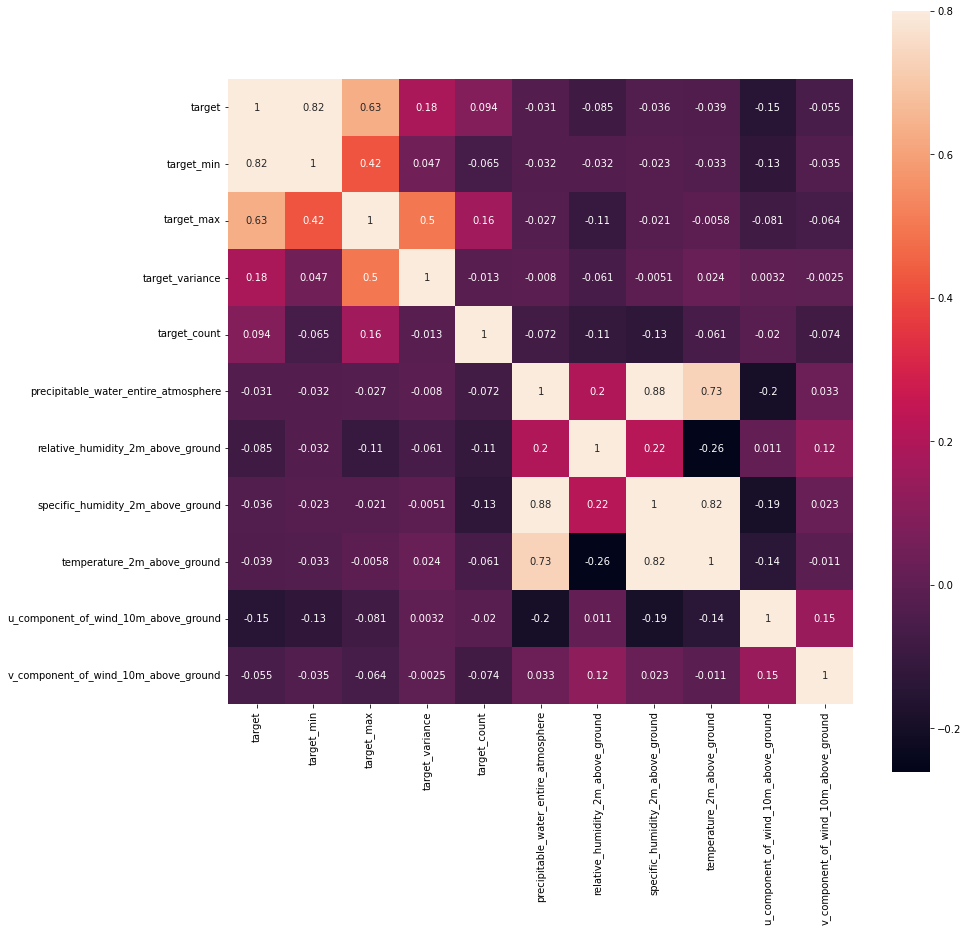

In [37]:
f=plt.pyplot.figure(figsize =(14, 14))
sns.heatmap(train_df1.corr(), vmax=.8, square=True, annot=True)

<AxesSubplot:>

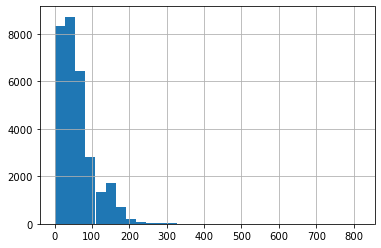

In [40]:
train_df1['target'].hist(bins=30)

In [114]:
#features and targets dataset
X = train_df2.drop(['target','Place_ID'], axis=1)
y = train_df2['target']

In [116]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [117]:
def modelfit(model, X_train, X_test, y_train, y_test, performance=True):
    
    
    #Fit the algorithm on the data
    model=model.fit(X_train,y_train)
        
    #Predict training set:
    y_pred_train = model.predict(X_test)
    
    #Perform cross-validation:
    if performance:
        RMSE_test = (MSE(y_test,y_pred_train))**(1/2)
    
    #Print model report:
    print ("\nModel Report")
    print('Test RMSE: {:.2f}'.format(RMSE_test))
    
    return model

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
lr = LinearRegression()
modelfit(lr, X_train_scaled , X_test_scaled, y_train, y_test, performance=True)


Model Report
Test RMSE: 37.11


LinearRegression()

In [153]:
ls = Lasso(alpha=0.4)
modelfit(ls, X_train_scaled , X_test_scaled, y_train, y_test, performance=True )


Model Report
Test RMSE: 37.27


Lasso(alpha=0.4)

In [124]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
modelfit(dt, X_train_scaled , X_test_scaled, y_train, y_test, performance=True )


Model Report
Test RMSE: 36.10


DecisionTreeRegressor(max_depth=5, random_state=42)

In [125]:
rf = RandomForestRegressor(n_estimators=30, max_depth=8)
modelfit(rf, X_train_scaled , X_test_scaled, y_train, y_test, performance=True )


Model Report
Test RMSE: 31.97


RandomForestRegressor(max_depth=8, n_estimators=30)

In [126]:
gbr = GradientBoostingRegressor(max_depth=6, 
                                subsample=0.9,
                                max_features=0.75,
                                n_estimators=100,
                                random_state=2)        
modelfit(gbr, X_train_scaled , X_test_scaled, y_train, y_test, performance=True )


Model Report
Test RMSE: 29.60


GradientBoostingRegressor(max_depth=6, max_features=0.75, random_state=2,
                          subsample=0.9)

In [154]:
import numpy as np
models = [("LM", ls), ("RF",rf)]
model_weightings = np.array([0.2, 0.5])
vr = VotingRegressor(estimators=models,weights=model_weightings)
modelfit(vr, X_train_scaled , X_test_scaled, y_train, y_test, performance=True )


Model Report
Test RMSE: 32.65


VotingRegressor(estimators=[('LM', Lasso(alpha=0.4)),
                            ('RF',
                             RandomForestRegressor(max_depth=8,
                                                   n_estimators=30))],
                weights=array([0.2, 0.5]))

In [155]:
meta_learner_reg = LinearRegression()
sr = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
modelfit(sr, X_train_scaled , X_test_scaled, y_train, y_test, performance=True)


Model Report
Test RMSE: 32.04


StackingRegressor(estimators=[('LM', Lasso(alpha=0.4)),
                              ('RF',
                               RandomForestRegressor(max_depth=8,
                                                     n_estimators=30))],
                  final_estimator=LinearRegression())

In [142]:
columns=['Date', 'Place_ID',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground','L3_NO2_NO2_column_number_density',
'L3_NO2_tropospheric_NO2_column_number_density','L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_SO2_SO2_column_number_density', ]
test_df1=test_df[columns]
test_df1.head()

,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_SO2_SO2_column_number_density
0,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000007,0.113310,0.017953,841.142869,0.000088,0.000221
1,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000005,0.110397,0.019576,1187.570320,0.000074,0.000034
2,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000006,0.112502,0.018736,944.341413,0.000042,0.000184
3,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000012,0.113312,0.018304,873.850358,0.000013,0.000201
4,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000008,0.114592,0.018666,666.809145,-0.000027,0.000093


In [137]:
test_df2=pre_process(test_df1)
test_df2=test_df2.drop('Place_ID', axis=1)

In [143]:
def gen_csv(model, df):
    
    submission = test_df[['Place_ID X Date']]
    pred = model.predict(df)
    submission['target']=pred
    submission.to_csv('submission.csv', index=None)


    return submission

In [147]:
gen_csv(rf, scaler.transform(test_df2))

C:\Users\DELL\AppData\Local\Temp/ipykernel_32216/2222423752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target']=pred


,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,37.248137
1,0OS9LVX X 2020-01-03,32.048531
2,0OS9LVX X 2020-01-04,27.927483
3,0OS9LVX X 2020-01-05,28.129749
4,0OS9LVX X 2020-01-06,28.214031
...,...,...
16131,ZZDJZMS X 2020-03-31,46.622460
16132,ZZDJZMS X 2020-04-01,58.935802
16133,ZZDJZMS X 2020-04-02,45.266197
16134,ZZDJZMS X 2020-04-03,50.320766


In [156]:
gen_csv(sr, scaler.transform(test_df2))

C:\Users\DELL\AppData\Local\Temp/ipykernel_32216/2222423752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target']=pred


,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,34.296460
1,0OS9LVX X 2020-01-03,30.494454
2,0OS9LVX X 2020-01-04,28.992406
3,0OS9LVX X 2020-01-05,27.246613
4,0OS9LVX X 2020-01-06,27.654259
...,...,...
16131,ZZDJZMS X 2020-03-31,43.646729
16132,ZZDJZMS X 2020-04-01,55.236878
16133,ZZDJZMS X 2020-04-02,41.563318
16134,ZZDJZMS X 2020-04-03,42.756592
